<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">TFM.</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# TFM: Regresión aplicada a medidas contra el COVID-19

Comenzaremos realizando una presentación y auditoría de los datos:

 <ol start="1">
  <li>Carga de un conjunto de datos y visualización</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
</ol>
   
Para eso necesitaremos las siguientes librerías:

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold

from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

%matplotlib inline

# 1. Carga del conjunto de datos y visualización

En primer lugar, se cargan los conjuntos de datos que hemos podido obtener desde:

https://data.humdata.org/dataset/acaps-covid19-government-measures-dataset

https://data.humdata.org/dataset/oxford-covid-19-government-response-tracker

El primer conjunto de datos contiene información acerca de los casos de COVID-19 en diferentes países y la evolución desde el inicio de la pandemia hasta prácticamente la actualidad. 

El segundo conjunto de datos contiene una complementación a las restricciones que se han impuesto a la población, describiendo las medidas empleadas mediante diferentes variables.

In [2]:
#Primeramente cargamos los datos utilizando la librería pandas
datos_covid = pd.read_excel('OURWORLD.xlsx')
datos_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68326,ZWE,Africa,Zimbabwe,2021-02-07,34552.0,65.0,166.286,1326.0,10.0,15.571,2324.710,4.373,11.188,89.215,0.673,1.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1064.0,336553.0,22.644,0.072,2613.0,0.176,0.064,15.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68327,ZWE,Africa,Zimbabwe,2021-02-08,34658.0,106.0,158.571,1339.0,13.0,15.000,2331.842,7.132,10.669,90.090,0.875,1.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2557.0,339110.0,22.816,0.172,2631.0,0.177,0.060,16.6,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68328,ZWE,Africa,Zimbabwe,2021-02-09,34781.0,123.0,138.143,1353.0,14.0,14.143,2340.118,8.276,9.294,91.032,0.942,0.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2447.0,341557.0,22.980,0.165,2386.0,0.161,0.058,17.3,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68329,ZWE,Africa,Zimbabwe,2021-02-10,34864.0,83.0,128.571,1364.0,

In [3]:
index_res=pd.read_csv('data.csv')
index_res

C:\Users\rgome\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3,5,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,#country,#country+code,NaN,NaN,NaN,#date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#severity+stringency+num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124760,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210315,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,0.0,NaN,NaN,36504.0,1504.0,48.15,48.15,53.57,53.57,41.77,41.77,47.74,47.74,0.0,0.0
124761,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36535.0,1507.0,NaN,48.15,NaN,53.57,NaN,41.77,NaN,47.74,NaN,0.0
124762,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36552.0,1508.0,NaN,48.15,NaN,53.57,NaN,41.77,NaN,47.74,NaN,0.0
124763,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36611.0,1509.0,NaN,48.15,NaN,53.57,NaN,41.77,NaN,47.74,NaN,0.0


In [11]:
index_res["H8_Protection of elderly people"].sample(20)

73294     0.0
49172     3.0
110624    0.0
16249     1.0
43452     0.0
63871     3.0
20572     NaN
110734    1.0
42900     2.0
24005     0.0
58482     1.0
55990     0.0
20322     NaN
12160     NaN
13129     NaN
101525    2.0
108831    0.0
66357     3.0
86976     0.0
94137     0.0
Name: H8_Protection of elderly people, dtype: float64

# 2. Análisis y limpieza del conjunto de datos

Se realizará un análisis previo de ambos conjuntos de datos para buscar posibles anomalías y realizar una limpieza de los conjuntos.

### 2.1 Primer conjunto

En el siguiente enlace: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv , se puede encontrar la descripción de todos los atributos y su procedencia, aún así, se presentan a continuación:

**iso_code**: ISO 3166-1 alpha-3 – código de 3 letras de los países.

**continent**: continente al que pertenece el país según localización geográfica.

**location**: nombre país.

**date**: fecha en la que se recoge el dato.

**total_cases**: total de casos confirmados de COVID-19.

**new_cases**: nuevos casos confirmados de COVID-19.

**new_cases_smoothed**: nuevos casos confirmados hace 7 días de COVID-19 (suavizado).

**total_deaths**: número total de muertes atribuidas al COVID-19.

**new_deaths**: nuevas muertes atribuidas al COVID-19.

**new_deaths_smoothed**: nuevas muertes atribuidas al COVID-19 desde hace 7 días (suavizado).

**total_cases_per_million**: total de casos confirmados de COVID-19 por millón de habitantes.

**new_cases_per_million**: nuevos casos confirmados de COVID-19 por millón de habitantes.

**new_cases_smoothed_per_million**: nuevos casos confirmados de COVID-19 por millón de habitantes desde hace siete día (suavizado).

**total_deaths_per_million**: número total de muertes atribuidas al COVID-19 por millon de habitantes.

**new_deaths_per_million**: nuevas muertes atribuidas al COVID-19 por millos de habitantes.

**new_deaths_smoothed_per_million**: nuevas muertes atribuidas al COVID-19 desde hace 7 días por millon de habitantes (suavizado).

**reproduction_rate**: estimación en tiempo real de la tasa de reproducción (R) del COVID-19.

**icu_patients**: número de pacientes afectados por COVID-19 en cuidados intensivos (UCI) en un día concreto.

**icu_patients_per_million**: número de pacientes afectados por COVID-19 en cuidados intensivos (UCI) en un día concreto por millón de habitantes.

**hosp_patients**: número de pacientes afectados por COVID-19 en un hospital en un día concreto.

**hosp_patients_per_million**: número de pacientes afectados por COVID-19 en un hospital en un día concreto por millón de habitantes.

**weekly_icu_admissions**: número de pacientes afectados por COVID-19 en cuidados intensivos (UCI) admitidos en una semana concreta.

**weekly_icu_admissions_per_million**: número de pacientes afectados por COVID-19 en cuidados intensivos (UCI) admitidos en una semana concreta por millón de habitantes.

**weekly_hosp_admissions**: número de pacientes afectados por COVID-19 admitidos en el hospital en una semana concreta.

**weekly_hosp_admissions_per_million**: número de pacientes afectados por COVID-19 admitidos en el hospital en una semana concreta por millón de habitantes.

**total_tests**: total de test de COVID-19 realizados.

**new_tests**: nuevos test de COVID-19 realizados.

**total_tests_per_thousand**: total de test de COVID-19 realizados por cada mil habitantes.

**new_tests_per_thousand**: nuevos test de COVID-19 realizados por cada mil habitantes.

**new_tests_smoothed**: nuevos test de COVID-19 realizados (hace 7 días suavizado). Para aquellos países que no informan acerca de los test diarios realizados, se asume que los cambios se producen en la misma proporción durante el periodo que no se informa. Esto produce unos datos diarios que se promedian en un periodo de 7 días.

**new_tests_smoothed_per_thousand**: nuevos test de COVID-19 realizados por cada mil habitantes (periodo de 7 días suavizado).

**positive_rate**: proporción de tests positivos de COVID-19, dado como un promedio móvil de 7 días (este dato es el inverso de tests_per_case)

**tests_per_case**: pruebas realizadas por cada nuevo caso confirmado de COVID-19, dado como un promedio móvil de 7 días (este dato es el inverso de positive_rate)

**tests_units**: unidades de tests utilizadas por la localización para poder aportar los datos.

**total_vaccinations**: número total de dosis de vacuna contra el COVID-19 administradas.

**people_vaccinated**: número total de personas que recibieron al menos una dosis de la vacuna contra el COVID-19.

**people_fully_vaccinated**: número total de personas que recibieron todas las dosis de vacuna contra el COVID-19 indicadas en el protocolo.

**new_vaccinations**: nuevas dosis de vacuna contra el COVID-19 administradas (calculado unicamente para días consecutivos).

**new_vaccinations_smoothed**: nuevas dosis de vacuna contra el COVID-19 administradas (7 días suavizados). Para aquellos países que no informan acerca de los test diarios realizados, se asume que los cambios se producen en la misma proporción durante el periodo que no se informa. Esto produce unos datos diarios que se promedian en un periodo de 7 días.

**total_vaccinations_per_hundred**: número total de dosis de vacuna contra el COVID-19 administradas por cada cien habitantes.

**people_vaccinated_per_hundred**: número total de personas que recibieron al menos una dosis de vacuna contra el COVID-19 administradas por cada cien habitantes.

**people_fully_vaccinated_per_hundred**: número total de personas que recibieron todas las dosis preescritas por el protocolo de vacunación contra el COVID-19 por cada cien habitantes.

**new_vaccinations_smoothed_per_million**: nuevas dosis de vacuna contra el COVID-19 administradas (periodo de 7 días suavizado) por millon de habitantes.

**stringency_index**: índice de rigurosidad de respuesta del gobierno: medida compuesta basada en 9 indicadores de respuesta incluyendo el cierre de colegios, cierre del lugar de trabajo y restricciones a la movilidad, en una escala de 0 a 100 (100= la más estricta respuesta)

**population**: población en 2020

**population_density**: densidad de población, número de habitantes por area en kilómetros cuadrados. año más reciente disponible.

**median_age**: media de edad de la población, estimación de la ONU en 2020.

**aged_65_older**: proporción de la población con mas de 65 años, año más reciente disponible.

**aged_70_older**: proporción de población con más de 70 años en 2015.

**gdp_per_capita**: producto interno bruto a paridad de poder adquisitivo (dólares internacionales constantes de 2011), año más reciente disponible

**extreme_poverty**: proporción de la población viviendo en extrema pobreza, año más reciente disponible desde el 2010.

**cardiovasc_death_rate**: ratio de muertes por enfermedades cardiovasculares en 2017 (número anual de muertes por cada 100.000 habitantes)

**diabetes_prevalence**: tasa de diabéticos (% de la población entre 20 y 79 años) en 2017

**female_smokers**: proporción de mujeres fumadoras, años más reciente disponible.

**male_smokers**: proporción de hombres fumadores, años más reciente disponible.

**handwashing_facilities**: proporción de la población con facilidades para lavarse las manos, año más reciente disponible.

**hospital_beds_per_thousand**: camas de hospital por cada 1000 habitantes, año más reciente disponible desde 2010.

**life_expectancy**: esperanza de vida al nacer en 2019.

**human_development_index**: índice compuesto que mide el logro promedio en tres dimensiones básicas del desarrollo humano: una vida larga y saludable, conocimiento y un nivel de vida decente. Valores del 2019 importados de http://hdr.undp.org/en/indicators/137506.

Este conjunto de datos nos servirá para extraer la variable objetivo (label) para el modelo. Para poder analizar las medidas impuestas por los diferentes países, nos centraremos en variables que no dependan de la densidad de población (per_million) y que a su vez sean visibles desde el inicio de la pandemia como son los contagios y las muertes diarios.

Si una medida ha sido efectiva el número de muertes y contagios deberían bajar (con algunas semanas de decalaje) mientras que si no surgen efectos los casos y muertes se mantendrían estables o incluso aumentarían.

También podemos extraer la media de edad y la densidad de población, factores importantes cuando se trata de propagación del COVID-19

In [4]:
#Seleccionamos las columnas que resultan de interés.
df1= datos_covid.iloc[:,[0,2,3,11,14,45,46]]
df1

,iso_code,location,date,new_cases_per_million,new_deaths_per_million,population_density,median_age
0,AFG,Afghanistan,2020-02-24,0.026,NaN,54.422,18.6
1,AFG,Afghanistan,2020-02-25,0.000,NaN,54.422,18.6
2,AFG,Afghanistan,2020-02-26,0.000,NaN,54.422,18.6
3,AFG,Afghanistan,2020-02-27,0.000,NaN,54.422,18.6
4,AFG,Afghanistan,2020-02-28,0.000,NaN,54.422,18.6
...,...,...,...,...,...,...,...
68326,ZWE,Zimbabwe,2021-02-07,4.373,0.673,42.729,19.6
68327,ZWE,Zimbabwe,2021-02-08,7.132,0.875,42.729,19.6
68328,ZWE,Zimbabwe,2021-02-09,8.276,0.942,42.729,19.6
68329,ZWE,Zimbabwe,2021-02-10,5.584,0.740,42.729,19.6


In [5]:
#Descripción estadística del conjunto de datos
df1.describe()

,new_cases_per_million,new_deaths_per_million,population_density,median_age
count,66791.000000,58072.000000,63894.000000,62296.000000
mean,62.569206,1.336195,323.526726,30.592797
std,165.748098,3.889914,1572.232566,9.119841
min,-2153.437000,-76.445000,0.137000,15.100000
25%,0.112000,0.000000,36.253000,22.200000
50%,5.610000,0.096000,83.479000,29.900000
75%,50.210500,1.019000,208.354000,39.100000
max,8652.658000,218.329000,19347.500000,48.200000


In [6]:
#Se crea una función que permite identificar si el dataset contiene
#valores nulos y cuantos nulos contiene.
def nulos(x):
    nul=x.isnull().sum()
    return round(nul*100/len(x),2)
print("PORCENTAJE DE VALORES NULOS")
df1.apply(nulos).sort_values(ascending=False)

PORCENTAJE DE VALORES NULOS


new_deaths_per_million    15.01
median_age                 8.83
population_density         6.49
iso_code                   4.42
new_cases_per_million      2.25
date                       0.00
location                   0.00
dtype: float64

Lo primero que podemos observar en este conjunto de datos es que nuestras variables objetivo, que son el nuevo número de muertes y casos por millon, contienen valores negativos, que podemos observar gracias a su valor mínimo. Estos valores negativos tendremos que limpiarlos ya que son errores.

En cuanto al porcentaje de valores nulos los encontramos en el nuevo número de muertes por millón. La mayor parte de estos valores nulos se deben a que en el inicio de la pandemia no se contabilizaban muertes. Limpiaremos los nulos correspondientes al resto de variables para no eliminar los registros correspondientes a los primeros días de la pandemia.

In [7]:
#Limpieza de registros nulos.
df1_clean=df1.dropna(subset=[
    'median_age', 
    'population_density',
    'iso_code',
    'new_cases_per_million'])
df1_clean.apply(nulos).sort_values(ascending=False)

new_deaths_per_million    12.29
median_age                 0.00
population_density         0.00
new_cases_per_million      0.00
date                       0.00
location                   0.00
iso_code                   0.00
dtype: float64

In [8]:
#Se asigna valor 0 al conjunto de registros correspondientes a valores
#nulos en la variable new_cases_per_million
df1_clean=df1_clean.fillna(0)

In [9]:
#Eliminamos los valores negativos
df1_clean = df1_clean.drop(
    df1_clean[df1_clean['new_cases_per_million']<0].index)
df1_clean = df1_clean.drop(
    df1_clean[df1_clean['new_deaths_per_million']<0].index)

In [10]:
print('Se han eliminado ' + str(len(df1)-len(df1_clean)) + ' filas que contenían valores nulos o valores negativos')

Se han eliminado 7775 filas que contenían valores nulos o valores negativos


### 2.1 Segundo conjunto

En el siguiente enlace: https://www.bsg.ox.ac.uk/sites/default/files/2020-12/BSG-WP-2020-032-v10.pdf , se puede encontrar la descripción de todos los atributos y su procedencia, aún así, se presentan a continuación:

**CountryName**: nombre del país.

**CountryCode**: código ISO del país.

**RegionName**: región geográfica.

**RegionCode**: código de la región.

**Jurisdiction**: jurisdicción.

**Date**: fecha.

**C_Flags**: indicador.

    0- Dirigido.
    
    1- General
    
    No data - Blank

**C1_Schoolclosing**: cierre de colegios.

    0-sin registros
    
    1-se recomienda el cierre.
    
    2-cierre en algunos niveles.
    
    3-todos los niveles cerrados

**C2_Workplaceclosing**: cierre de trabajos.
    
    0-sin registros
    
    1-se recomienda el cierre o teletrabajo.
    
    2-cierre en algunos niveles u obligación de teletrabajo.
    
    3-todos los niveles cerrados excepto lo esencial.

**C3_Cancelpublicsevents**: cancelación de eventos públicos.
    
    0-sin registros
    
    1-se recomienda cancelar.
    
    2-requiere cancelación.


**C4_Restrcctionsongatherings**: restricciones a las reuniones.
    
    0-sin restricciones.
    
    1-limite de 1000 personas.
    
    2-entre 101-1000 personas.
    
    3-10 personas o menos

**C5_Close public transport**: cierre del transporte público.
    
    0-sin registros
    
    1-se recomienda cancelar o reducir significativamente el volumen.
    
    2-prohibido.

**C6_Stay at home requirements**: cierre domiciliario.
    
    0-sin registros
    
    1-se recomienda no salir de casa.
    
    2-se prohibe salir de casa con excepciones como el deporte.
    
    3-se prohibe salir de casa con mínimas excepciones


**C7_Restriction on internal movement**: restricciones a la movilidad interna.
    
    0-sin registros.
    
    1-se recomienda no viajar entre regiones o ciudades.
    
    2-restricciones a la movilidad interna.
    

**C8_International travel controls**: controles internacionales al viaje.
    
    0-sin registros.
    
    1-Monitorizado
    
    2-Llegadas de zonas de alto riesgo en cuarentena.
    
    3-Prohibición de llegadas desde algunas regiones.
    
    4-Prohibicion de todas las regiones, fronteras cerradas.
    
**E_Flags**: indicador.

    0- Solo trabajadores, sector formal.
    
    1- Trabajadores del sector informal incluidos.
    
    No data - Blank

**E1_Income support**: apoyo a los ingresos.
    
    0-sin ingresos.
    
    1-el gobierno aporta menos del 50% del salario.
    
    2-el gobierno aporta 50% del salario o más.
    

**E2_Debit/contract relief for households**: alivio de obligaciones financieras.
    
    0-no.
    
    1-pequeño, un tipo de contrato.
    
    2-ampliación de la deuda.
    

**E3_Fiscal measures**: medidas fiscales.
    
    0-No.
    
    Value-Valor monetario USD de estimulos fiscales record, incluyendo gastos o recortes
    

**E4_Provinding support to other countries**: ayudas provenientes de otros paises
    
    0-no.
    
    Value-Valor monetario.

**H_Flags**: indicador.

    0- Dirigido.
    
    1- General.
    
    No data - Blank

    
**H1_Public info campaings**: registro de campañas de información públicas
    
    0-Sin campañas de información pública de COVID-19.
    
    1-Funcionarios públicos pidiendo precaución sobre COVID-19.
    
    2-Información pública coordinada por medios tradicionales y sociales.
    
**H2_Testing policy**: política de test.
    
    0-No hay política de test contra el COVID-19.
    
    1-Para aquellos que tienen síntomas y cumplen algunos criterios   específicos.
    
    2-Se realizan test a todos aquellos que muestran síntomas de COVID-19.
    
    3-Test abiertos al público, cualquiera puede hacerse un test.
    
**H3_Contact tracing**: rastreos.
    
    0-No hay rastreos.
    
    1-Se hacen rastreos limitados.
    
    2-Se realiza un rastreo a todos los casos identificados.
    
**H4_Emergency investment in health care**: inversión de emergencia en cuidados de la salud.
    
    0-No.
    
    Registro del valor monetario del gasto a corto plazo en salud.
    
**H5_Investment in vaccines**: anuncios públicos de gasto en desarrollo de vacunas.
    
    0-No.
    
    Valor del registro monetario anunciado.
    
**H6_Facial Coverings**: políticas de uso de mascarillas.
    
    0-No hay políticas.
    
    1-Recomendado.
    
    2-Requerido en algunos espacios públicos fuera de casa con otras personas presentes, o algunas situaciones en las que no se pueda mantener distancia social.
    
    3-Requerido en todos los espacios públicos fuera de casa y todas las situaciones en las que no se pueda mantener la distancia social.
    
    4-Requerido siempre fuera de casa todo el tiempo.
    
**H7_Vaccination Policy**: políticas de vacunación.
    
    0-No disponible.
    
    1-Disponible para uno de los siguientes: trabajadores esenciales, grupos vulnerables, grupos de mayores.
    
    2-Disponible para dos de los siguientes: trabajadores esenciales, grupos vulnerables, grupos de mayores.
    
    3-Disponible para todos los siguientes: trabajadores esenciales, grupos vulnerables, grupos de mayores.
    
    4-Disponible para los tres grupos más disponibilidad adicional.
    
    5- Disponibilidad universal
    
**M1_Misc. wild card**: anuncios que no encajan en otro lugar.

Este conjunto de datos, que como podemos ver contiene una descripción más detallada del índice de rigurosidad, nos aportará las variables predictoras (features). Seleccionaremos por tanto todas las variables que explican el caracter de las medidas impuestas.

In [11]:
df2= index_res.iloc[:,[0,1,5,41,24,25,30,31,6,8,10,12,14,16,18,20,21,23,26,28,29,32,34,36]]
df2

,CountryName,CountryCode,Date,StringencyIndex,E3_Fiscal measures,E4_International support,H4_Emergency investment in healthcare,H5_Investment in vaccines,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people
0,#country,#country+code,#date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,20200101,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200102,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200103,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200104,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124760,Zimbabwe,ZWE,20210315,48.15,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,0.0,3.0,3.0,0.0
124761,Zimbabwe,ZWE,20210316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124762,Zimbabwe,ZWE,20210317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124763,Zimbabwe,ZWE,20210318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
StringencyIndex,119887.0,5.213085e+01,2.670749e+01,0.00,36.11,57.87,72.22,1.000000e+02
E3_Fiscal measures,96594.0,1.379764e+08,1.003078e+10,-0.01,0.00,0.00,0.00,1.957600e+12
E4_International support,96639.0,9.348225e+06,2.686505e+09,-0.02,0.00,0.00,0.00,8.343531e+11
H4_Emergency investment in healthcare,96383.0,8.630437e+06,9.669931e+08,0.00,0.00,0.00,0.00,2.424000e+11
H5_Investment in vaccines,96519.0,5.940217e+05,6.272620e+07,0.00,0.00,0.00,0.00,1.575000e+10
C1_School closing,120186.0,1.800542e+00,1.178367e+00,0.00,1.00,2.00,3.00,3.000000e+00
C2_Workplace closing,120227.0,1.400193e+00,1.026187e+00,0.00,0.00,2.00,2.00,3.000000e+00
C3_Cancel public events,120270.0,1.347759e+00,8.132551e-01,0.00,1.00,2.00,2.00,2.000000e+00
C4_Restrictions on gatherings,120252.0,2.469431e+00,1.617863e+00,0.00,0.00,3.00,4.00,4.000000e+00
C5_Close public transport,119965.0,5.418747e-01,6.866699e-01,0.00,0.00,0.00,1.00,2.000000e+00


In [13]:
df2.apply(nulos).sort_values(ascending=False)

H4_Emergency investment in healthcare    22.75
H5_Investment in vaccines                22.64
E3_Fiscal measures                       22.58
E4_International support                 22.54
H7_Vaccination policy                    17.48
H8_Protection of elderly people           6.64
E1_Income support                         5.38
E2_Debt/contract relief                   4.96
C8_International travel controls          4.54
H6_Facial Coverings                       4.28
H3_Contact tracing                        4.07
H2_Testing policy                         3.96
StringencyIndex                           3.91
H1_Public information campaigns           3.85
C5_Close public transport                 3.85
C6_Stay at home requirements              3.83
C7_Restrictions on internal movement      3.82
C1_School closing                         3.67
C2_Workplace closing                      3.64
C4_Restrictions on gatherings             3.62
C3_Cancel public events                   3.60
Date         

Para este conjunto de datos eliminaremos completamente los valores nulos ya que los diferentes indicadores de las medidas no tienen un significado para el valor nulo.

In [14]:
df2_clean=df2.dropna()
print('Se han eliminado ' + str(len(df2)-len(df2_clean)) + ' filas que contenían valores nulos o valores negativos')

Se han eliminado 38511 filas que contenían valores nulos o valores negativos


# 3. Unión de los conjuntos de datos

Para poder implementar el modelo uniremos ambos conjuntos de datos. La unión se realizará a partir de la fecha y el código de país, de esta forma los datos encajan perfectamente.

Aquellos datos que no se correspondan entre ellos los descartaremos pero no será un impedimento para implementar el modelo ya que el número de filas del conjunto de datos es alto.

Para poder realizar la unión es necesario que la fecha se encuentre en el mismo formato. 

In [15]:
#Observamos que ambas variables no estan en el mismo formato
print(df2_clean.Date.head(5), '\n')

print(df1_clean.date.head(5))

1    20200101
2    20200102
3    20200103
4    20200104
5    20200105
Name: Date, dtype: object 

0    2020-02-24
1    2020-02-25
2    2020-02-26
3    2020-02-27
4    2020-02-28
Name: date, dtype: object


In [16]:
#Se transforma toda la columna a caracteres para no tener ningun problema.
df2_clean['Date']=df2_clean['Date'].astype(str)

#Se pasa de caracteres a formato fecha para poder realizar la unión en 
#ambos dataset.
df2_clean['Date']=pd.to_datetime(df2_clean['Date'])
df1_clean['date']=pd.to_datetime(df1_clean['date'])
print(df2_clean['Date'].head(5))
print(df1_clean['date'].head(5))

1   2020-01-01
2   2020-01-02
3   2020-01-03
4   2020-01-04
5   2020-01-05
Name: Date, dtype: datetime64[ns]
0   2020-02-24
1   2020-02-25
2   2020-02-26
3   2020-02-27
4   2020-02-28
Name: date, dtype: datetime64[ns]


<ipython-input-16-ec91b7b3de72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_clean['Date']=df2_clean['Date'].astype(str)
<ipython-input-16-ec91b7b3de72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_clean['Date']=pd.to_datetime(df2_clean['Date'])


In [17]:
#Se realiza la unión.
df=pd.merge(df1_clean, df2_clean, 
            left_on=['iso_code','date'],
            right_on=['CountryCode','Date'], 
            how='inner')
#Se eliminan las columnas repetidas
df=df.iloc[:,[0,1,2,3,4,5,6,10,11,12,13,14,15,16,
              17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
df

,iso_code,location,date,new_cases_per_million,new_deaths_per_million,population_density,median_age,StringencyIndex,E3_Fiscal measures,E4_International support,H4_Emergency investment in healthcare,H5_Investment in vaccines,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people
0,AFG,Afghanistan,2020-02-24,0.026,0.000,54.422,18.6,8.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,AFG,Afghanistan,2020-02-25,0.000,0.000,54.422,18.6,8.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,AFG,Afghanistan,2020-02-26,0.000,0.000,54.422,18.6,8.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,AFG,Afghanistan,2020-02-27,0.000,0.000,54.422,18.6,8.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,AFG,Afghanistan,2020-02-28,0.000,0.000,54.422,18.6,8.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61906,ZWE,Zimbabwe,2021-02-07,4.373,0.673,42.729,19.6,84.26,0.0,0.0,0.0,0.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,4.0,0.0,0.0
61907,ZWE,Zimbabwe,2021-02-08,7.132,0.875,42.729,19.6,84.26,0.0,0.0,0.0,0.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,4.0,0.0,0.0
61908,ZWE,Zimbabwe,2021-02-09,8.276,0.942,42.729,19.6,84.26,0.0,0.0,0.0,0.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,4.0,0.0,0.0
61909,ZWE,Zimbabwe,2021-02-10,5.584,0.740,42.729,19.6,84.26,0.0,0.0,0.0,0.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,4.0,0.0,0.0


# 4. Análisis y visualización de los datos

Se realiza un análisis de los datos y su evolución.

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
new_cases_per_million,61911.0,6.939161e+01,1.573824e+02,0.00,0.4545,8.489,60.0655,3.475672e+03
new_deaths_per_million,61911.0,1.352819e+00,3.220151e+00,0.00,0.0000,0.091,1.1060,1.418650e+02
population_density,61911.0,1.813007e+02,6.468602e+02,1.98,23.2580,73.726,145.7250,7.915731e+03
median_age,61911.0,3.169799e+01,9.259155e+00,15.10,23.3000,31.900,40.8000,4.820000e+01
StringencyIndex,61911.0,5.985616e+01,2.145752e+01,0.00,47.2200,62.960,76.8500,1.000000e+02
E3_Fiscal measures,61911.0,2.128339e+08,1.252727e+10,-0.01,0.0000,0.000,0.0000,1.957600e+12
E4_International support,61911.0,1.457800e+07,3.356446e+09,0.00,0.0000,0.000,0.0000,8.343531e+11
H4_Emergency investment in healthcare,61911.0,1.297779e+07,1.205412e+09,0.00,0.0000,0.000,0.0000,2.424000e+11
H5_Investment in vaccines,61911.0,8.215022e+05,7.451069e+07,0.00,0.0000,0.000,0.0000,1.575000e+10
C1_School closing,61911.0,2.049038e+00,1.024960e+00,0.00,1.0000,2.000,3.0000,3.000000e+00


Text(0, 0.5, 'Conteo escala logarítmica')

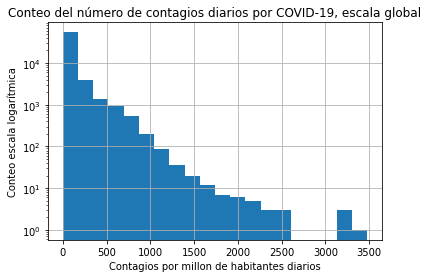

In [23]:
#Histograma de las variables objetivo

df.hist(['new_cases_per_million'], bins=20, log=True)
plt.title('Conteo del número de contagios diarios por COVID-19, escala global')
plt.xlabel('Contagios por millon de habitantes diarios')
plt.ylabel('Conteo escala logarítmica')

Esta gráfica nos dice que en la mayor parte de los países y la mayoría de los días, desde el inicio de la pandemia, el número de contagios diarios se ha encotrado entre 0 y 500 contagios por millón.

Text(0, 0.5, 'Conteo escala logarítmica')

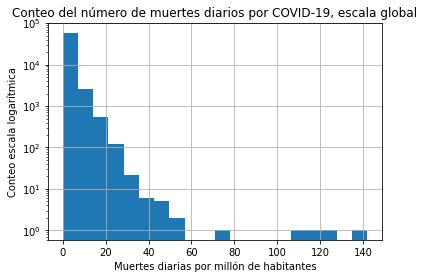

In [24]:
df.hist([ 'new_deaths_per_million'], bins=20, log=True)
plt.title('Conteo del número de muertes diarios por COVID-19, escala global')
plt.xlabel('Muertes diarias por millón de habitantes')
plt.ylabel('Conteo escala logarítmica')

Lo mismo ocurre para las muertes diarias. Con mayor frecuencia, a nivel global las muertes diarias se encuentran entre 0 y 20 muertes por millón.

Se presentan ahora los países más afectados en número de contagios diarios.

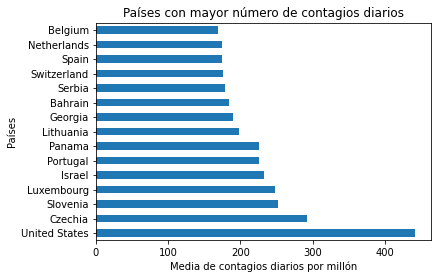

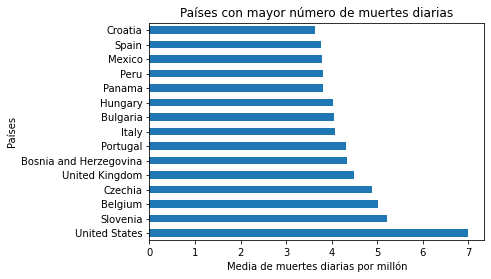

In [26]:
paises_afectados=df.groupby(['location']).mean()
paises_afectados['new_cases_per_million'].sort_values(ascending=False).head(15).plot.barh()
plt.title("Países con mayor número de contagios diarios")
plt.ylabel("Países")
plt.xlabel("Media de contagios diarios por millón")
plt.show()

paises_afectados['new_deaths_per_million'].sort_values(ascending=False).head(15).plot.barh()
plt.title("Países con mayor número de muertes diarias")
plt.ylabel("Países")
plt.xlabel("Media de muertes diarias por millón")
plt.show()

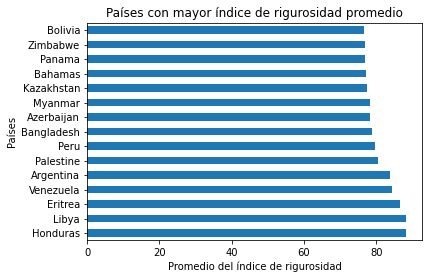

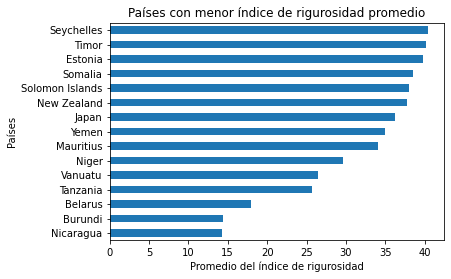

In [30]:
paises_afectados['StringencyIndex'].sort_values(ascending=False).head(15).plot.barh()
plt.title("Países con mayor índice de rigurosidad promedio")
plt.ylabel("Países")
plt.xlabel("Promedio del índice de rigurosidad")
plt.show()

paises_afectados['StringencyIndex'].sort_values(ascending=True).head(15).plot.barh()
plt.title("Países con menor índice de rigurosidad promedio")
plt.ylabel("Países")
plt.xlabel("Promedio del índice de rigurosidad")
plt.show()

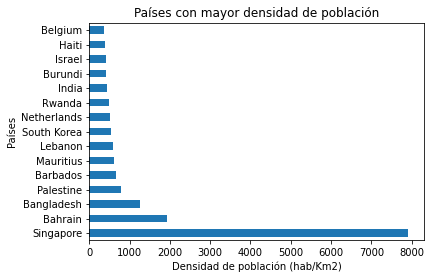

In [33]:
paises_afectados['population_density'].sort_values(ascending=False).head(15).plot.barh()
plt.title("Países con mayor densidad de población")
plt.ylabel("Países")
plt.xlabel("Densidad de población (hab/Km2)")
plt.show()

# 5. Dividiendo el dataset

Para dividir el dataset es necesario primeramente establecer un decalaje entre las variables objetivo y predictoras dado que desde el momento en el que se produjo el contagio y la contabilización de dicho contagio debe pasar un periodo de tiempo. Este decalaje consistirá en 1, 2 y 3 semanas de forma que se podrá establecer que modelo se adapta y predice mejor los resultados.

In [38]:
#Listamos los codigos de paises
lista_paises=(list(set(df.iso_code)))
print(sorted(lista_paises))

['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GRC', 'GTM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MLI', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLB', 'SLE', 'SLV', 'SOM', 'SRB', 'SUR', 'SVK', 'SVN', 'SWE', 'SWZ', 'SYC', 'TCD'

In [64]:
#El siguiente fragmento de codigo aplica un decalaje por países y seleciona las 
#etiquetas y las variables

#CREAMOS LOS DIFERENTES DATASET
features_sd=pd.DataFrame()
features_d1=pd.DataFrame()
features_d2=pd.DataFrame()
features_d3=pd.DataFrame()

label_sd=pd.DataFrame()
label_d1=pd.DataFrame()
label_d2=pd.DataFrame()
label_d3=pd.DataFrame()

for i in lista_paises:
    data = df[df.iso_code==i]
    
    #SELECCIONAMOS Y AGRUPAMOS LAS FEATURES. NO SE LES APLICA DECALAJE, SOLO SE ELIMINA LAS SEMANAS CORRESPONDIENTES.
    f=data.iloc[:,5:28]

    features_sd=pd.concat([features_sd, f])
    features_d1=pd.concat([features_d1, f.iloc[7:,]])
    features_d2=pd.concat([features_d2, f.iloc[14:,]])
    features_d3=pd.concat([features_d3, f.iloc[21:,]])
    
    
    #SELECCIONAMOS LAS ETIQUETAS Y APLICAMOS EL DECALAJE CON SHIFT
    etiqueta=data.iloc[:,[3,4]]

    d1=etiqueta.shift(7).dropna(subset=['new_cases_per_million'])
    d2=etiqueta.shift(14).dropna(subset=['new_cases_per_million'])
    d3=etiqueta.shift(21).dropna(subset=['new_cases_per_million'])
    
    label_sd=pd.concat([label_sd,etiqueta])
    label_d1=pd.concat([d1,label_d1])
    label_d2=pd.concat([d2,label_d2])
    label_d3=pd.concat([d3,label_d3])
    

In [97]:
#Almacenamos las variables en un array para poder ejecutar los modelos en bucle, de forma que features[0] será sin decalaje,
# features[1] con una semana de decalaje, etc.
features=np.array([features_sd,features_d1,features_d2,features_d3])
labels=np.array([label_sd,label_d1,label_d2,label_d3])

<ipython-input-97-b587a6cd3ec8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  features=np.array([features_sd,features_d1,features_d2,features_d3])
<ipython-input-97-b587a6cd3ec8>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  labels=np.array([label_sd,label_d1,label_d2,label_d3])


# 6 MODELO RANDOMFOREST

Implementaremos los 4 modelos utilizando los diferentes decalajes y compararemos los resultados. El mejor modelo lo optimizaremos y observaremos cuales son los principales predictores, los cuales nos dirán que variables son más relevantes a la hora de determinar los contagios. De esta forma sabremos si hay medidas que ayudan a frenar el COvid-19 y cuales son.

In [123]:
for i in range(4):
    
    #ESTANDARIZAMOS LOS DATOS
    sca=StandardScaler()
    x=sca.fit_transform(features[i])
    
    #DIVIDIENDO EL DATASET EN TRAIN Y TEST
    x_train,x_test,y_train,y_test = train_test_split(x,labels[i].new_cases_per_million, test_size=0.33, random_state=20)
    print(str(i) + " SEMANAS DE DECALAJE" + "\n")
    print("Nº de filas de x_train:" + str(len(x_train))+"\n"+
          "Nº de filas de x_test:" + str(len(x_test))+"\n"+
          "Nº de filas de y_train:" + str(len(y_train))+"\n"+
          "Nº de filas de y_test:" + str(len(y_test)))

    #IMPLEMENTACIÓN DEL MODELO RANDOMFOREST
    Regresion= RandomForestRegressor(n_estimators=100,random_state=20, n_jobs = -1)
    Regresion.fit(x_train,y_train)

    #GENERANDO PREDICCIONES
    y_pred= Regresion.predict(x_test)
    print("\nR2: " + str(r2_score(y_test,y_pred)) + "\n")
    print("MAE: " + str(mean_absolute_error(y_test,y_pred)) + "\n")


0 SEMANAS DE DECALAJE

Nº de filas de x_train:41480
Nº de filas de x_test:20431
Nº de filas de y_train:41480
Nº de filas de y_test:20431

R2: 0.7517027021963237

MAE: 23.783391981006655

1 SEMANAS DE DECALAJE

Nº de filas de x_train:40715
Nº de filas de x_test:20055
Nº de filas de y_train:40715
Nº de filas de y_test:20055

R2: 0.6892046754680978

MAE: 28.860181395956406

2 SEMANAS DE DECALAJE

Nº de filas de x_train:39951
Nº de filas de x_test:19678
Nº de filas de y_train:39951
Nº de filas de y_test:19678

R2: 0.67091106814383

MAE: 29.81393615692926

3 SEMANAS DE DECALAJE

Nº de filas de x_train:39186
Nº de filas de x_test:19302
Nº de filas de y_train:39186
Nº de filas de y_test:19302

R2: 0.683950569361135

MAE: 29.524825795479174



In [124]:
#UILIZAMOS EL MEJOR MODELO PARA LA OPTIMIZACION, 0 SEMANAS DE DECALAJE
#ESTANDARIZAMOS LOS DATOS
sca=StandardScaler()
x=sca.fit_transform(features[0])
    
#DIVIDIENDO EL DATASET EN TRAIN Y TEST
x_train,x_test,y_train,y_test = train_test_split(x,labels[0].new_cases_per_million, test_size=0.33, random_state=20)


In [120]:

#OPTIMIZACION DEL MODELO

param_grid = {'n_estimators': [200, 300, 400],
              'max_features': [5, 10, 15, 20, 25, 30],
              'max_depth': [None, 3, 10, 20, 25, 30]}

#Utilizamos validacion cruzada con el grid para buscar los mejores parámetros
grid=GridSearchCV(estimator=RandomForestRegressor(random_state=20),
                  param_grid=param_grid,
                  scoring= 'neg_root_mean_squared_error',
                  n_jobs = -1,
                  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=20),
                  refit = True,
                  verbose= 0,
                  return_train_score= True)

grid.fit(X=x_train, y= y_train)

#Sacamos los mejores resultados
grid.best_params_


{'max_depth': 25, 'max_features': 5, 'n_estimators': 300}

In [126]:
#IMPLEMENTACIÓN DEL MODELO RANDOMFOREST OPTIMIZADO
Regresion_optimizada= RandomForestRegressor(n_estimators=300,
                                 random_state=20, 
                                 n_jobs = -1, 
                                 max_depth=25,
                                 max_features=5)
Regresion_optimizada.fit(x_train,y_train)

#GENERANDO PREDICCIONES
y_pred= Regresion_optimizada.predict(x_test)
print("R2: " + str(r2_score(y_test,y_pred)) + "\n")
print("MAE: " + str(mean_absolute_error(y_test,y_pred)))

R2: 0.7520693988827409

MAE: 23.836023339549453


In [127]:
#Resultados utilizando R2 como métrica de validación
resultados=cross_val_score(Regresion_optimizada,x_train,y_train, cv=5, scoring='r2')
print("Los resultados R2 de la validación cruzada son:"+str(resultados))
print("La media de todos las R2 es: " + str(resultados.mean())+"\n"+
      "La desviación estandar de todas las R2 es: "+ str(resultados.std())+"\n")

#Resultados utilizando la media del error absoluto como métrica de validación
resultados=cross_val_score(Regresion_optimizada,x_train,y_train, cv=5, scoring="neg_mean_absolute_error")
print("Los resultados MAE de la validación cruzada son:"+str(resultados))
print("La media de todos las MAE es: " + str(resultados.mean())+"\n"+
      "La desviación estandar de todas las MAE es: "+ str(resultados.std())+"\n")

Los resultados R2 de la validación cruzada son:[0.80745303 0.70902666 0.77398202 0.74102806 0.76626402]
La media de todos las R2 es: 0.7595507568966038
La desviación estandar de todas las R2 es: 0.032996158650326415

Los resultados MAE de la validación cruzada son:[-23.00243596 -24.4516918  -24.30654043 -23.81797953 -23.3932064 ]
La media de todos las MAE es: -23.794370822964574
La desviación estandar de todas las MAE es: 0.5446172329758189



In [128]:
#IMPORTANCIA DE LOS PREDICTORES
importancia=pd.DataFrame({'predictor' : features_d1.columns,
                          'importancia' : Regresion_optimizada.feature_importances_})
importancia.sort_values('importancia',ascending=False)

,predictor,importancia
1,median_age,0.164079
21,H7_Vaccination policy,0.149362
0,population_density,0.090277
2,StringencyIndex,0.089134
20,H6_Facial Coverings,0.081893
10,C4_Restrictions on gatherings,0.050123
18,H2_Testing policy,0.046220
14,C8_International travel controls,0.046188
22,H8_Protection of elderly people,0.045675
12,C6_Stay at home requirements,0.030145


# MODELO RED NEURONAL FULLY CONNECT